In [13]:
from fvhoe.boundary_conditions import BoundaryCondition
from fvhoe.initial_conditions import sod
from fvhoe.romain_solver import cons_to_prim, weno
from fvhoe.solver import EulerSolver
import matplotlib.pyplot as plt
import numpy as np

In [14]:
N = 100
p = 0
cfl = 0.8
riemann_solver = "hllc"

In [15]:
u = weno(
    tend=0.245,
    n=N,
    cfl=cfl,
    ic_type="sod test",
    bc_type="free",
    riemann_solver=riemann_solver,
    time=p + 1,
    space=p + 1,
)

solver = EulerSolver(
    w0=sod,
    CFL=cfl,
    nx=N,
    px=p,
    riemann_solver=riemann_solver,
    bc=BoundaryCondition(x="free"),
    gamma=1.4,
)
solver.rkorder(0.245)

cell= 100  itermax= 100000
Done  66 0.24654766500279954


  0%|          | 0/0.245 [00:00]

100%|██████████| 0.245/0.245 [00:01]                


t=0.00, x=[0.01, 0.99], y=0.50, z=0.50
t=0.24, x=[0.01, 0.99], y=0.50, z=0.50
t=0.00, x=[0.01, 0.99], y=0.50, z=0.50
t=0.24, x=[0.01, 0.99], y=0.50, z=0.50
t=0.00, x=[0.01, 0.99], y=0.50, z=0.50
t=0.24, x=[0.01, 0.99], y=0.50, z=0.50


Text(0.5, 0, '$x$')

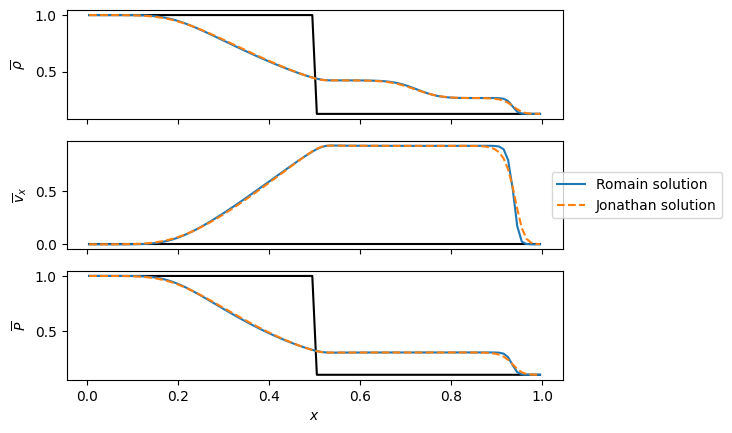

In [16]:
fig, ax = plt.subplots(3, sharex=True)

w = cons_to_prim(u[-1])

for i, (var, label) in enumerate(
    zip(
        ["rho", "vx", "P"],
        [r"$\overline{\rho}$", r"$\overline{v}_x$", r"$\overline{P}$"],
    )
):
    solver.plot_1d_slice(ax[i], t=0, color="k", param=var, y=0.5, z=0.5)
    ax[i].plot(solver.x, w[i], label="Romain solution")
    solver.plot_1d_slice(
        ax[i],
        t=0.245,
        param=var,
        y=0.5,
        z=0.5,
        label=r"Jonathan solution",
        linestyle="--",
    )
    ax[i].set_ylabel(label)

ax[1].legend(loc="center", bbox_to_anchor=(1.15, 0.5))
ax[2].set_xlabel("$x$")